In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv("HR_Analytics.csv")
data_df[:5]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Scatter chart and Line chart

Text(0.5, 1.0, 'Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm')

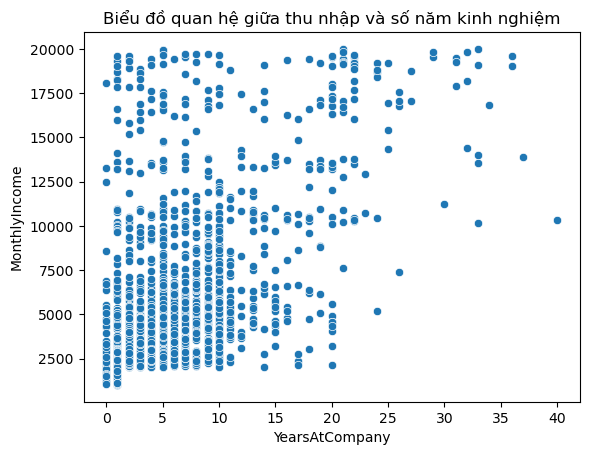

In [11]:
sns.scatterplot(data = data_df, x = "YearsAtCompany", y = "MonthlyIncome")
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")

Text(0.5, 1.0, 'Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm')

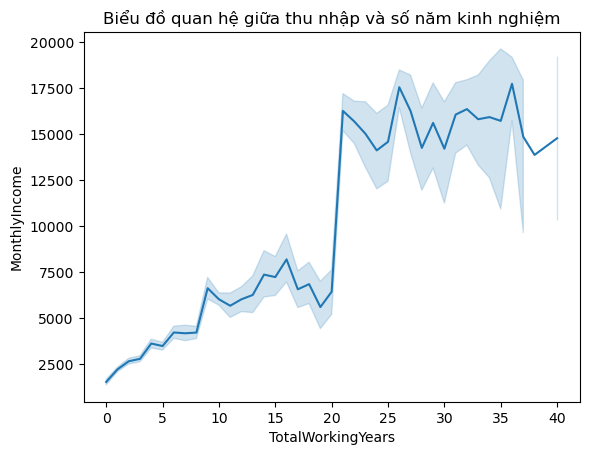

In [41]:
sns.lineplot(data = data_df, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean)
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")

Text(0.5, 1.0, 'Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm')

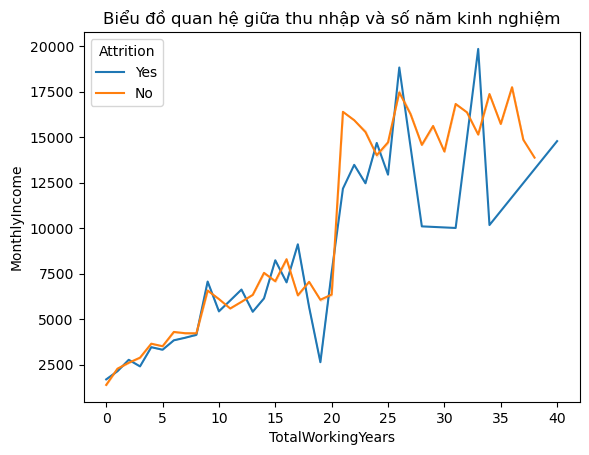

In [39]:
sns.lineplot(data = data_df, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean,
             hue="Attrition", errorbar=('ci', 0))
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")

In [20]:
roles = data_df.groupby('JobRole').size()
roles

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [22]:
def data_df_job(data, job):
    return data[data['JobRole'] == job]

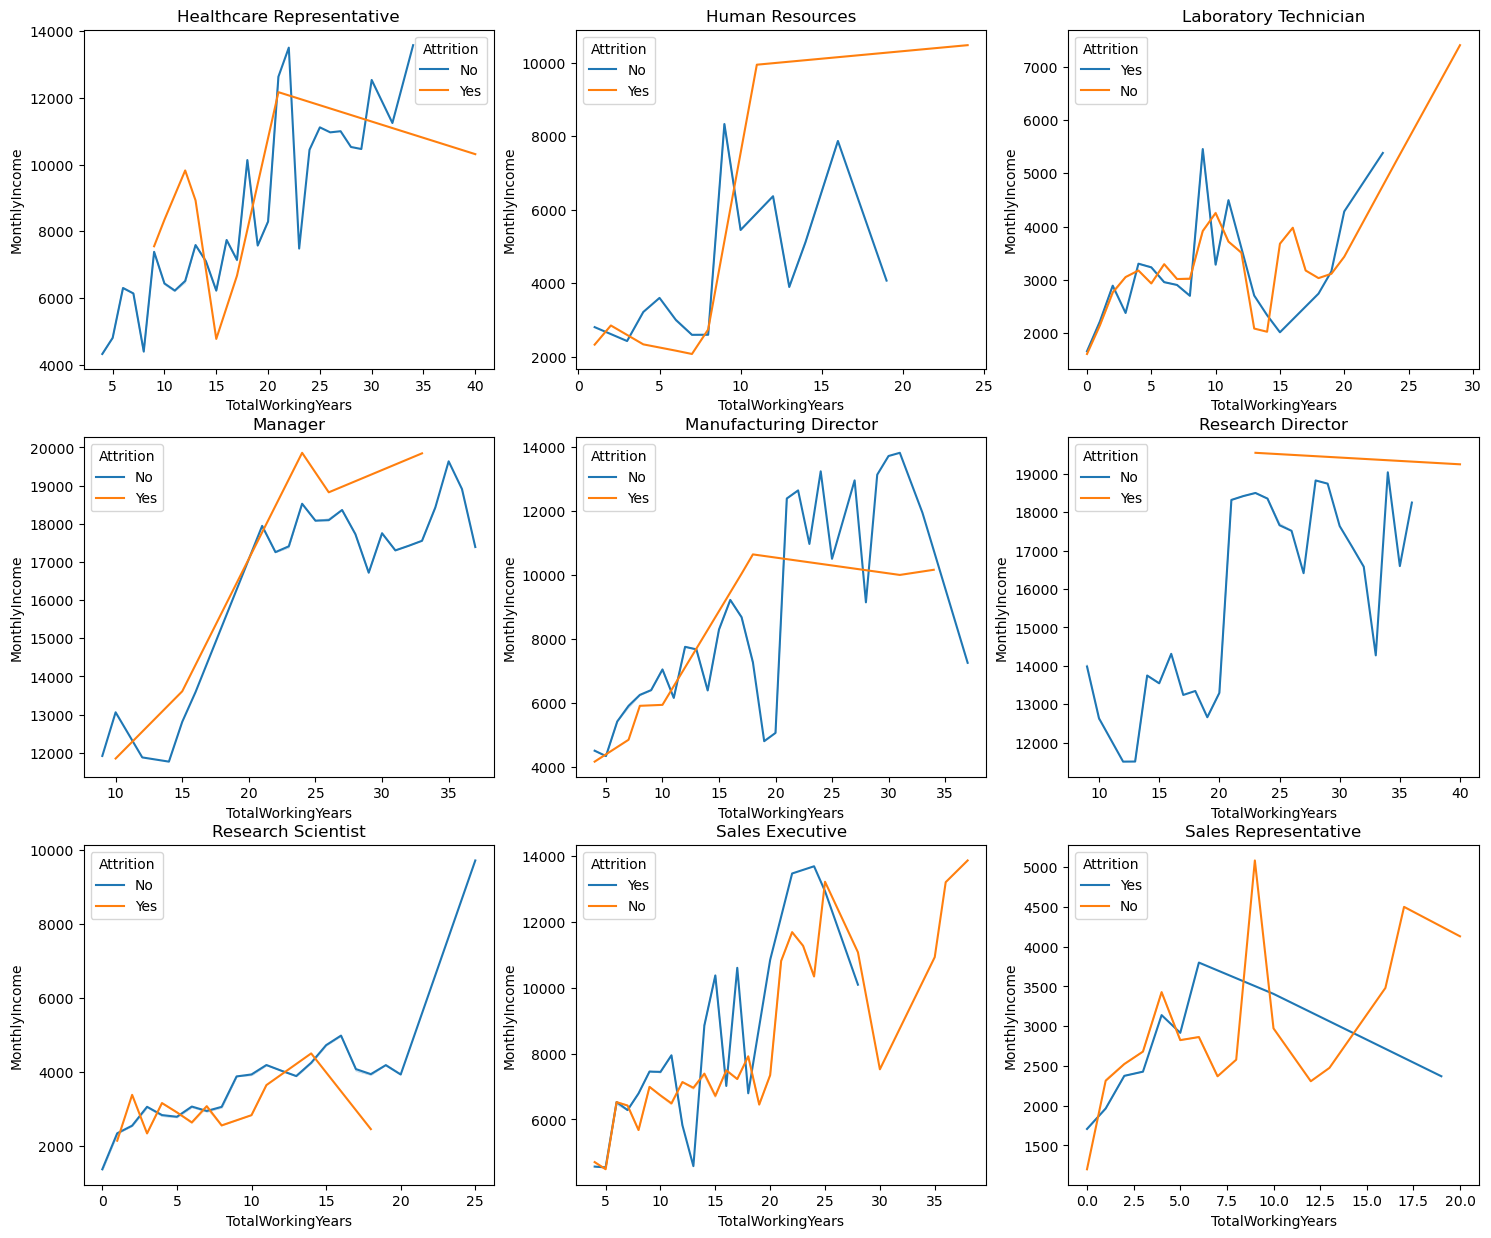

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(18, 5*3))
axs = axs.flatten()
for i, role in enumerate(roles.index):
    role_df = data_df_job(data_df, role)
    sns.lineplot(data = role_df, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean, 
                 hue="Attrition", errorbar=('ci', 0), ax = axs[i])
    axs[i].set_title(role)
